In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import pathlib
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
path_to_downloaded_file = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(path_to_downloaded_file)
print(data_dir)

/root/.keras/datasets/flower_photos


In [ ]:
print(list(data_dir.glob('*')))

[PosixPath('/root/.keras/datasets/flower_photos/sunflowers'), PosixPath('/root/.keras/datasets/flower_photos/roses'), PosixPath('/root/.keras/datasets/flower_photos/daisy'), PosixPath('/root/.keras/datasets/flower_photos/tulips'), PosixPath('/root/.keras/datasets/flower_photos/dandelion'), PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt')]


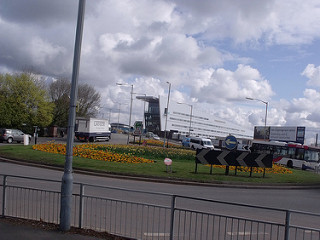

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

In [ ]:
img_height, img_width = 180, 180
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = data_dir,
    validation_split = 0.2,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    seed = 2023,
    subset = 'training'
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = data_dir,
    validation_split = 0.2,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    seed = 2023,
    subset = 'validation'
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)
print(num_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
5


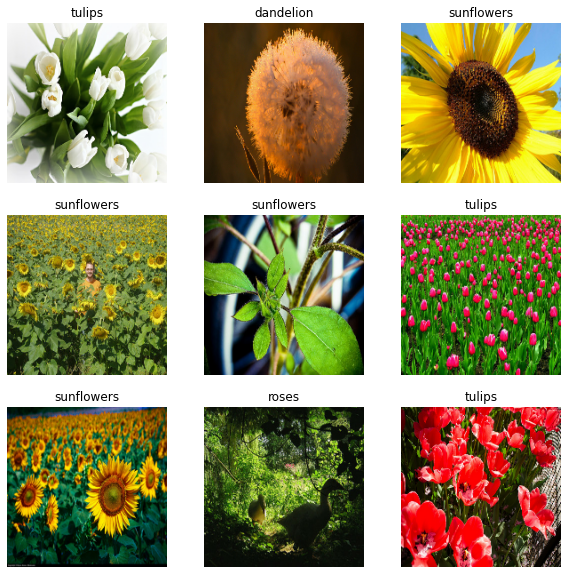

In [ ]:
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#Build the model

In [ ]:
resnet_model = Sequential()

pretrained_model = keras.applications.ResNet50(
    include_top = False,
    input_shape = (img_height, img_width, 3),
    pooling = 'avg',
    classes = num_classes,
)

for layer in pretrained_model.layers:
  layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(5, activation = 'softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
____________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model

In [ ]:
print(validation_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
num_epochs = 12
history = resnet_model.fit(
    train_ds,
    validation_data = validation_ds,
    epochs = num_epochs
)

Epoch 1/12
92/92 [==============================] - 377s 4s/step - loss: 0.7438 - accuracy: 0.7629 - val_loss: 0.4931 - val_accuracy: 0.8174
Epoch 2/12
92/92 [==============================] - 340s 4s/step - loss: 0.2825 - accuracy: 0.8978 - val_loss: 0.4916 - val_accuracy: 0.8338
Epoch 3/12
92/92 [==============================] - 353s 4s/step - loss: 0.1768 - accuracy: 0.9377 - val_loss: 0.4153 - val_accuracy: 0.8569
Epoch 4/12
92/92 [==============================] - 352s 4s/step - loss: 0.0946 - accuracy: 0.9697 - val_loss: 0.4480 - val_accuracy: 0.8515
Epoch 5/12
92/92 [==============================] - 350s 4s/step - loss: 0.0645 - accuracy: 0.9826 - val_loss: 0.4708 - val_accuracy: 0.8474
Epoch 6/12
92/92 [==============================] - 353s 4s/step - loss: 0.0405 - accuracy: 0.9901 - val_loss: 0.4693 - val_accuracy: 0.8556
Epoch 7/12
92/92 [==============================] - 351s 4s/step - loss: 0.0306 - accuracy: 0.9915 - val_loss: 0.5062 - val_accuracy: 0.8624
Epoch 8/12
92

#Evaluate model

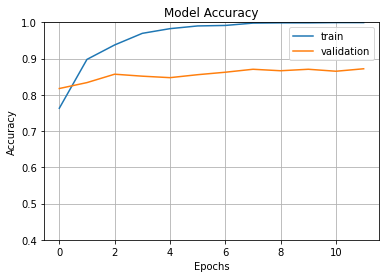

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

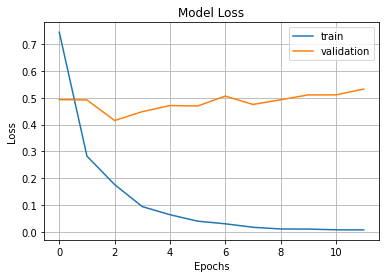

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

#Predict

In [ ]:
import cv2
image=cv2.imread(str(tulips[23]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 179ms/step
[[3.9999873e-06 7.3350898e-10 8.0792452e-05 1.4352359e-07 9.9991500e-01]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is tulips


In [ ]:
for _ in range(10):
  i = np.random.randint(len(tulips))
  image=cv2.imread(str(tulips[i]))
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  pred=resnet_model.predict(image)
  output_class=class_names[np.argmax(pred)]
  print(f"The predicted class for image {i} is", output_class)


1/1 [==============================] - 0s 178ms/step
The predicted class for image 233 is tulips
1/1 [==============================] - 0s 272ms/step
The predicted class for image 566 is tulips
1/1 [==============================] - 0s 348ms/step
The predicted class for image 106 is tulips
1/1 [==============================] - 0s 448ms/step
The predicted class for image 615 is tulips
1/1 [==============================] - 0s 185ms/step
The predicted class for image 621 is tulips
1/1 [==============================] - 0s 196ms/step
The predicted class for image 407 is tulips
1/1 [==============================] - 0s 164ms/step
The predicted class for image 570 is daisy
1/1 [==============================] - 0s 124ms/step
The predicted class for image 317 is tulips
1/1 [==============================] - 0s 126ms/step
The predicted class for image 285 is tulips
1/1 [==============================] - 0s 124ms/step
The predicted class for image 765 is tulips
